In [1]:
import numpy as np
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt

In [2]:
# weights in logistic regression can be interpreted as linear regression only but with a catch
# We can think of log(odds) = linear combination of Xi
# log(odds) = a0*x0 + a1*x1 + .... + an*xn

# 1. L2 Regularization

In [67]:
N = 100
D = 2


X = np.random.randn(N,D)

# center the first 50 points at (-2,-2)
X[:50,:] = X[:50,:] - 2*np.ones((50,D))

# center the last 50 points at (2, 2)
X[50:,:] = X[50:,:] + 2*np.ones((50,D))

# labels: first 50 are 0, last 50 are 1
T = np.array([0]*50 + [1]*50)

# add a column of ones
# ones = np.array([[1]*N]).T
ones = np.ones((N, 1))
Xb = np.concatenate((ones, X), axis=1)

# randomly initialize the weights
w = np.random.randn(D + 1)


# calculate the model output
z = Xb.dot(w)

def sigmoid(z):
    return 1/(1 + np.exp(-z))


Y = sigmoid(z)

# calculate the cross-entropy error
def cross_entropy(T, Y):
    E = 0
    for i in range(len(T)):
        if T[i] == 1:
            E -= np.log(Y[i])
        else:
            E -= np.log(1 - Y[i])
    return E

In [68]:
# let's do gradient descent 100 times
learning_rate = 0.1
loss = []
for i in range(100):
    if i % 10 == 0:
        print(cross_entropy(T, Y))
        loss.append(cross_entropy(T, Y))

    # gradient descent weight udpate with regularization
    w += learning_rate * ( Xb.T.dot(T - Y) - 0.1*w )

    # recalculate Y
    Y = sigmoid(Xb.dot(w))


print("Final w:", w)

182.49864998524853
1.2008038320139078e-06
4.421646265937322e-06
1.4373808011623196e-05
4.174650084348953e-05
0.0001095033274687383
0.00026197499200648704
0.0005767703007749624
0.00117817560044639
0.0022498336704394194
Final w: [-0.1120536   6.09588329  6.16157013]


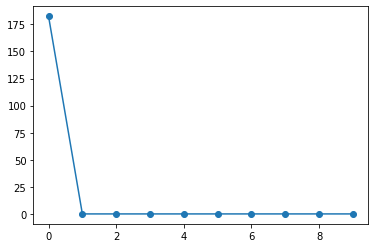

In [69]:
plt.plot(loss, marker="o")
plt.show()

# 2. L1 Regularization

In [70]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def sigmoid(z):
  return 1/(1 + np.exp(-z))

N = 50
D = 50

# uniformly distributed numbers between -5, +5
X = (np.random.random((N, D)) - 0.5)*10
# X = (np.random.randn(N, D) - 0.5)*10

# true weights - only the first 3 dimensions of X affect Y
true_w = np.array([1, 0.5, -0.5] + [0]*(D - 3))

# generate Y - add noise with variance 0.5
Y = np.round(sigmoid(X.dot(true_w) + np.random.randn(N)*0.5))

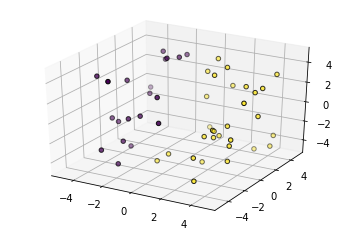

In [91]:
# let's plot the data to see what it looks like
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=Y, edgecolor="black")
plt.show()

In [75]:
# perform gradient descent to find w
costs = [] # keep track of squared error cost
w = np.random.randn(D) / np.sqrt(D) # randomly initialize w
learning_rate = 0.001
l1 = 3.0 # try different values - what effect does it have on w?
for t in range(100):
  # update w
  Yhat = sigmoid(X.dot(w))
  delta = Yhat - Y
  w = w - learning_rate*(X.T.dot(delta) + l1*np.sign(w))

  # find and store the cost
  cost = -(Y*np.log(Yhat) + (1-Y)*np.log(1 - Yhat)).mean() + l1*np.abs(w).mean()
  costs.append(cost)

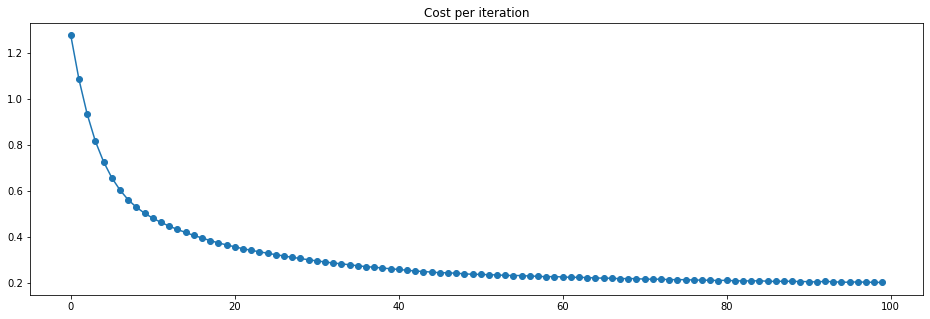

In [88]:
# plot the costs
plt.figure(figsize=(16, 5))
plt.plot(costs, marker="o")
plt.title("Cost per iteration")
plt.show()

In [78]:
print("final w:", w)

final w: [ 0.90549339  0.22830531 -0.15449417  0.00128031 -0.08626005 -0.00270261
  0.00022305  0.00145536 -0.00028067 -0.0011335  -0.00306994  0.00173387
 -0.00152971 -0.0012328  -0.01636259 -0.00208581  0.07725854  0.00000195
  0.0012258  -0.00318668  0.00259085 -0.00355106 -0.00860784  0.00034977
 -0.0003936   0.00025134 -0.0022615   0.00192541 -0.20599373 -0.00263115
 -0.00823944 -0.13432392 -0.00115273  0.04950241  0.00425811  0.00132538
  0.00045589  0.01314523  0.00026511  0.00004194 -0.00271425 -0.00033617
  0.00082049 -0.0213422   0.00001089  0.00016408  0.00396728 -0.00065046
 -0.00158585  0.0012486 ]


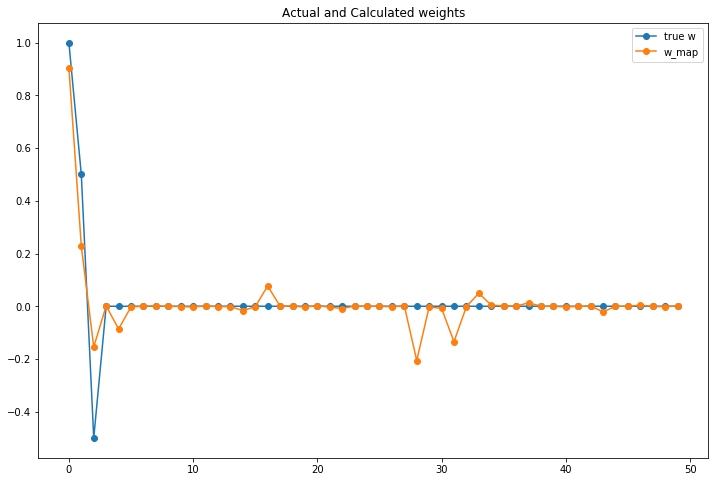

In [87]:
# plot our w vs true w
plt.figure(figsize=(12, 8))
plt.plot(true_w, label='true w', marker="o")
plt.plot(w, label='w_map', marker="o")
plt.title("Actual and Calculated weights")
plt.legend()
plt.show()